In [14]:
# Header
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import io
from scipy import stats

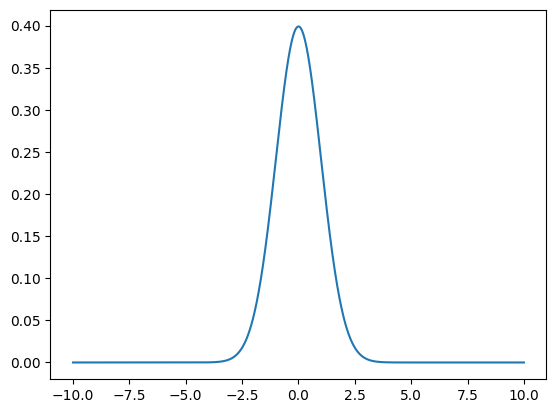

In [30]:
x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, stats.norm.pdf(x_axis,0,1))
plt.show()

## Simple stats demo
* Import data from excel
* or simulate data from normal distribution

In [17]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# for excel-derived csv data
import csv
dialect = csv.excel()
excel_mat = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]), index_col=0)
excel_mat.head()
group_a = excel_mat.iloc[:,0]
group_b = excel_mat.iloc[:,1]

In [24]:
# or simulation data
sample_size = 1000
group_a = np.random.normal(0, 1, sample_size)
group_b = np.random.normal(0.5, 1, sample_size)

1.8966481301271937e-34


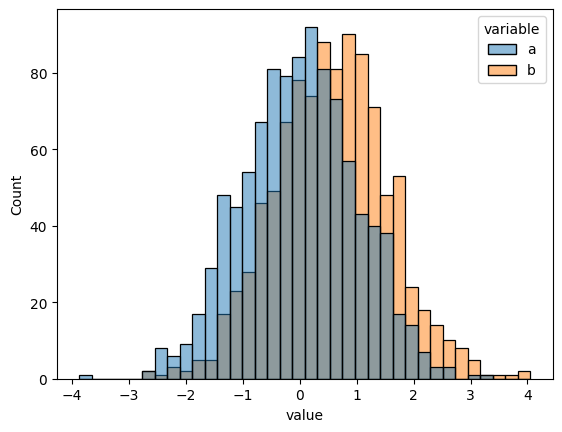

In [25]:
mat = pd.DataFrame({'a':group_a, 'b':group_b})
sns.histplot(mat.melt(), x='value', hue='variable')
t, p = stats.ttest_ind(group_a, group_b, equal_var=False)
print(p)

In [28]:
u, p = stats.wilcoxon(group_a, group_b)
print(p)

3.693476459615487e-31


# RNA-seq data analysis (beginner's guide)
  * Download count data automatically created by NCBI
  * Visualize it


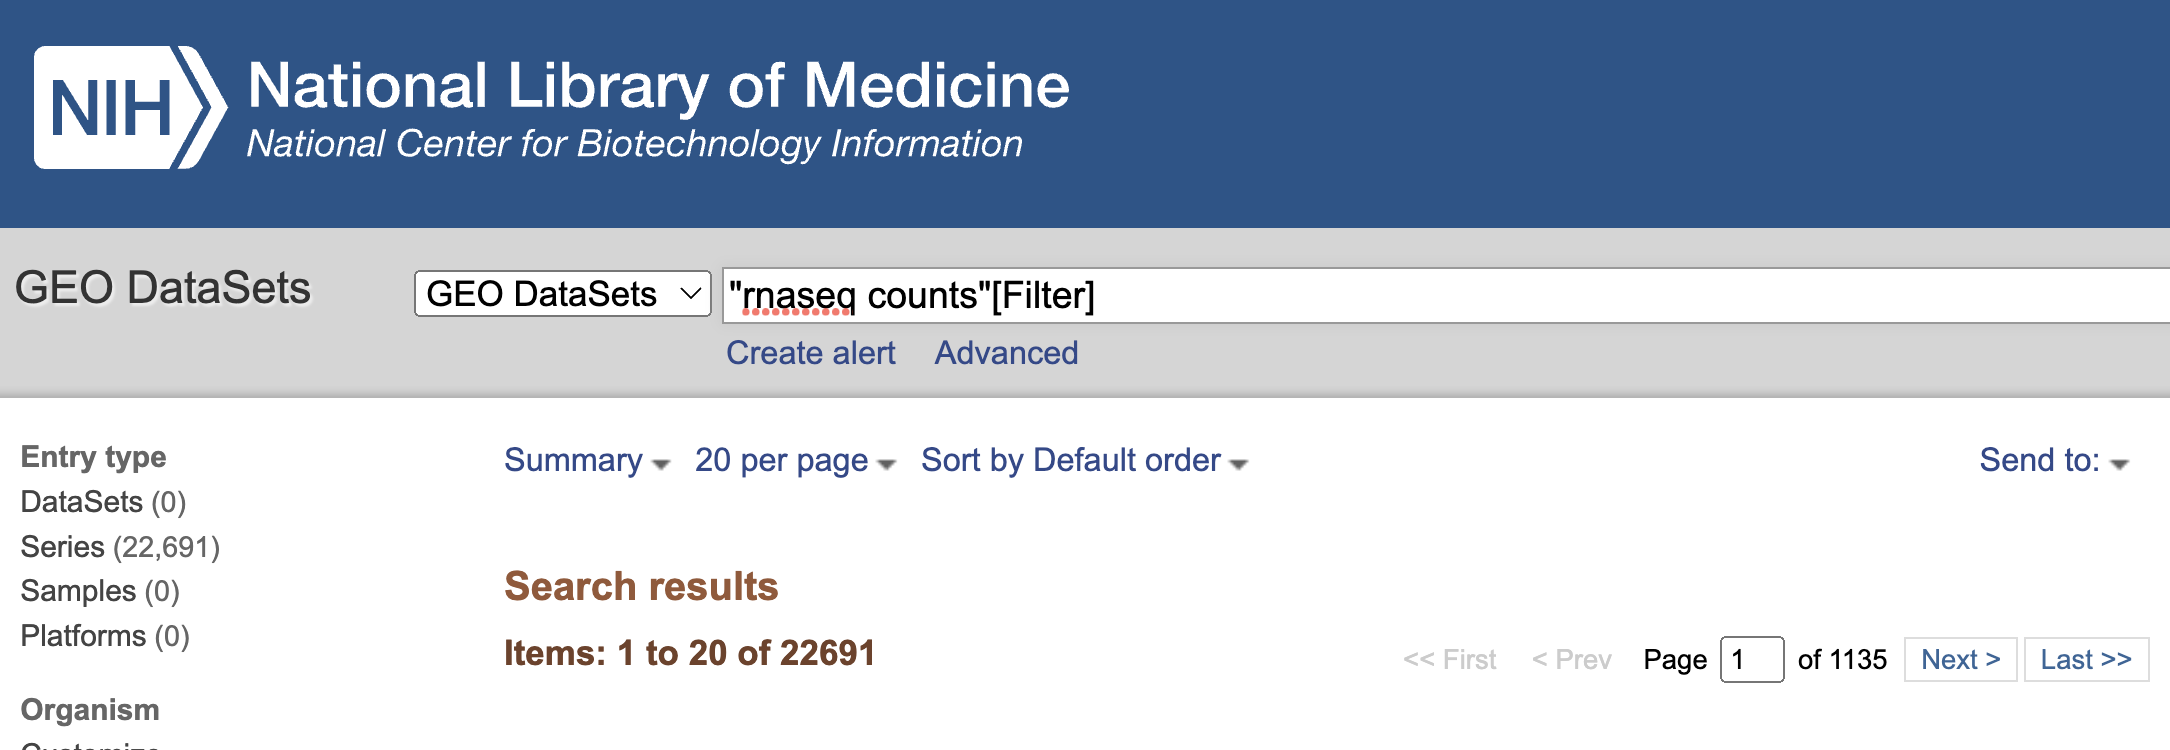

[Tamai et al. 2022. Cell Rep Methods.](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE188822)

[Takahashi et al. 2022. Cell Rep Methods.](https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE184071)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GSE188822_norm_counts_TPM_GRCh38.p13_NCBI.tsv.gz to GSE188822_norm_counts_TPM_GRCh38.p13_NCBI.tsv.gz


In [ ]:
uploaded

In [3]:
# for gzipped data matrix
df = pd.read_csv("/content/GSE188822_norm_counts_TPM_GRCh38.p13_NCBI.tsv.gz", sep="\t")
df = df.set_index ('GeneID')
df.head()

,GSM5690629,GSM5690630,GSM5690631,GSM5690632,GSM5690633,GSM5690634,GSM5690635,GSM5690636,GSM5690637,GSM5690638,...,GSM5690643,GSM5690644,GSM5690645,GSM5690646,GSM5690647,GSM5690648,GSM5690649,GSM5690650,GSM5690651,GSM5690652
GeneID,,,,,,,,,,,,,,,,,,,,,
100287102,0.06188,0.0559,0.2396,0.1172,0.1814,0.0642,0.05699,0.05563,0.06216,0.1482,...,0.148,0.07032,0.1299,0.2270,0.06754,0.00,0.07207,0.1701,0.1324,0.1332
653635,33.81000,29.7000,34.3100,24.5100,22.8200,26.3200,19.05000,18.23000,18.63000,37.8500,...,23.280,28.04000,24.5700,26.5700,15.26000,19.81,17.23000,29.3800,33.5100,23.4400
102466751,31.57000,33.9500,42.6900,22.7700,29.3800,32.7500,5.53800,13.51000,10.57000,70.2000,...,12.580,20.50000,22.0900,22.0600,8.20400,12.03,12.26000,28.9200,27.3500,22.6500
107985730,0.38000,0.5149,0.7357,0.3598,0.1857,0.0000,0.17500,0.00000,0.00000,0.4550,...,0.000,0.21590,0.1995,0.2324,0.20740,0.00,0.22130,0.2611,0.2033,0.2044
100302278,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,...,0.000,0.00000,0.0000,0.0000,0.00000,0.00,0.00000,0.0000,0.0000,0.0000


In [ ]:
# for normal data
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

In [4]:
sample_list = {'GSM5690629':'HFLF_iMES_pre_1',
  'GSM5690630': 'HFLF_iMES_pre_2',
  'GSM5690631': 'HFLF_iMES_pre_3',
  'GSM5690632':	'HFLF_iMES_post_1',
  'GSM5690633':	'HFLF_iMES_post_2',
  'GSM5690634':	'HFLF_iMES_post_3',
  'GSM5690635':	'HFLF_pre_1',
  'GSM5690636': 'HFLF_pre_2',
  'GSM5690637':	'HFLF_pre_3',
  'GSM5690638': 'HFLF_post_1',
  'GSM5690639': 'HFLF_post_2',
  'GSM5690640': 'HFLF_post_3',
  'GSM5690641': 'HDF_iMES_pre_1',
  'GSM5690642':'HDF_iMES_pre_2',
  'GSM5690643':'HDF_iMES_pre_3',
  'GSM5690644':'HDF_iMES_post_1',
  'GSM5690645':'HDF_iMES_post_2',
  'GSM5690646':'HDF_iMES_post_3',
  'GSM5690647':'HDF_pre_1',
  'GSM5690648':'HDF_pre_2',
  'GSM5690649':'HDF_pre_3',
  'GSM5690650':'HDF_post_1',
  'GSM5690651':'HDF_post_2',
  'GSM5690652':'HDF_post_3'}

In [5]:
for key in sample_list:
  print(sample_list[key])
  temp = [sample_list[key]]+sample_list[key].split('_')
  if len(temp) == 5:
    sample_list[key] = temp
  else:
    sample_list[key] = temp[0:2]+['']+temp[2:len(temp)]

metadata = pd.DataFrame.from_dict(sample_list).transpose()
metadata.columns = ['sample', 'celltype', 'iMES', '3dculture', 'rep']
metadata.head()

HFLF_iMES_pre_1
HFLF_iMES_pre_2
HFLF_iMES_pre_3
HFLF_iMES_post_1
HFLF_iMES_post_2
HFLF_iMES_post_3
HFLF_pre_1
HFLF_pre_2
HFLF_pre_3
HFLF_post_1
HFLF_post_2
HFLF_post_3
HDF_iMES_pre_1
HDF_iMES_pre_2
HDF_iMES_pre_3
HDF_iMES_post_1
HDF_iMES_post_2
HDF_iMES_post_3
HDF_pre_1
HDF_pre_2
HDF_pre_3
HDF_post_1
HDF_post_2
HDF_post_3


,sample,celltype,iMES,3dculture,rep
GSM5690629,HFLF_iMES_pre_1,HFLF,iMES,pre,1
GSM5690630,HFLF_iMES_pre_2,HFLF,iMES,pre,2
GSM5690631,HFLF_iMES_pre_3,HFLF,iMES,pre,3
GSM5690632,HFLF_iMES_post_1,HFLF,iMES,post,1
GSM5690633,HFLF_iMES_post_2,HFLF,iMES,post,2


In [6]:
metadata

,sample,celltype,iMES,3dculture,rep
GSM5690629,HFLF_iMES_pre_1,HFLF,iMES,pre,1
GSM5690630,HFLF_iMES_pre_2,HFLF,iMES,pre,2
GSM5690631,HFLF_iMES_pre_3,HFLF,iMES,pre,3
GSM5690632,HFLF_iMES_post_1,HFLF,iMES,post,1
GSM5690633,HFLF_iMES_post_2,HFLF,iMES,post,2
GSM5690634,HFLF_iMES_post_3,HFLF,iMES,post,3
GSM5690635,HFLF_pre_1,HFLF,,pre,1
GSM5690636,HFLF_pre_2,HFLF,,pre,2
GSM5690637,HFLF_pre_3,HFLF,,pre,3
GSM5690638,HFLF_post_1,HFLF,,post,1


In [15]:
ldf = np.log10(df+1)
min_value = ldf.stack().min()
max_value = ldf.stack().max()
print(min_value, max_value)
# or you can set an arbitrary value by removing the first # of the lines below
# min_value = 0
# max_value = 1
cmap = ['Blues', 'CMRmap', 'RdBu_r', 'viridis', 'magma'][2]

0.0 4.757858928224344


<Axes: ylabel='GeneID'>

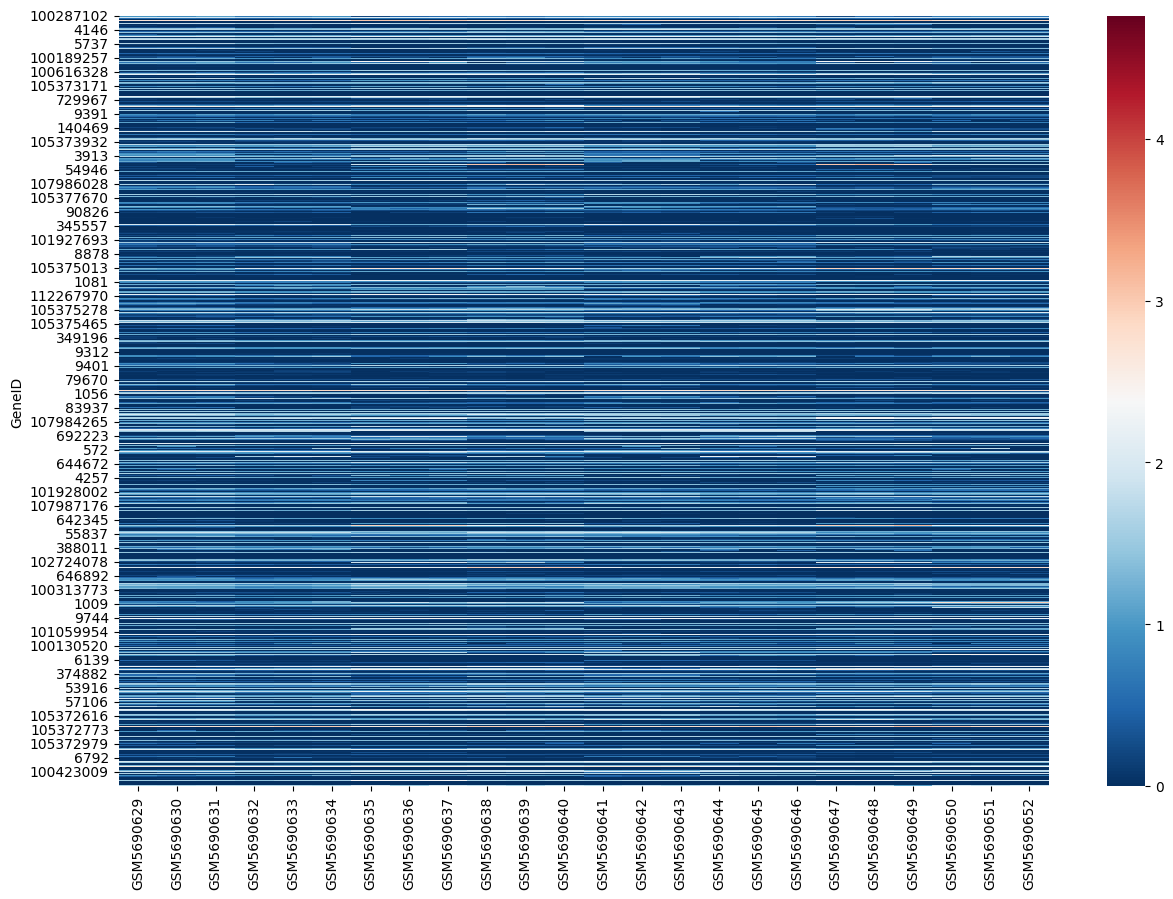

In [18]:
plt.figure(figsize=(15, 10)) # fig size width x height
sns.heatmap(ldf, vmax=max_value, vmin=min_value, cmap=cmap)

In [28]:
ldf = ldf.reindex(ldf.mean().sort_values(ascending=False).index, axis=1)

In [33]:
ldf.columns = metadata[['sample']]

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


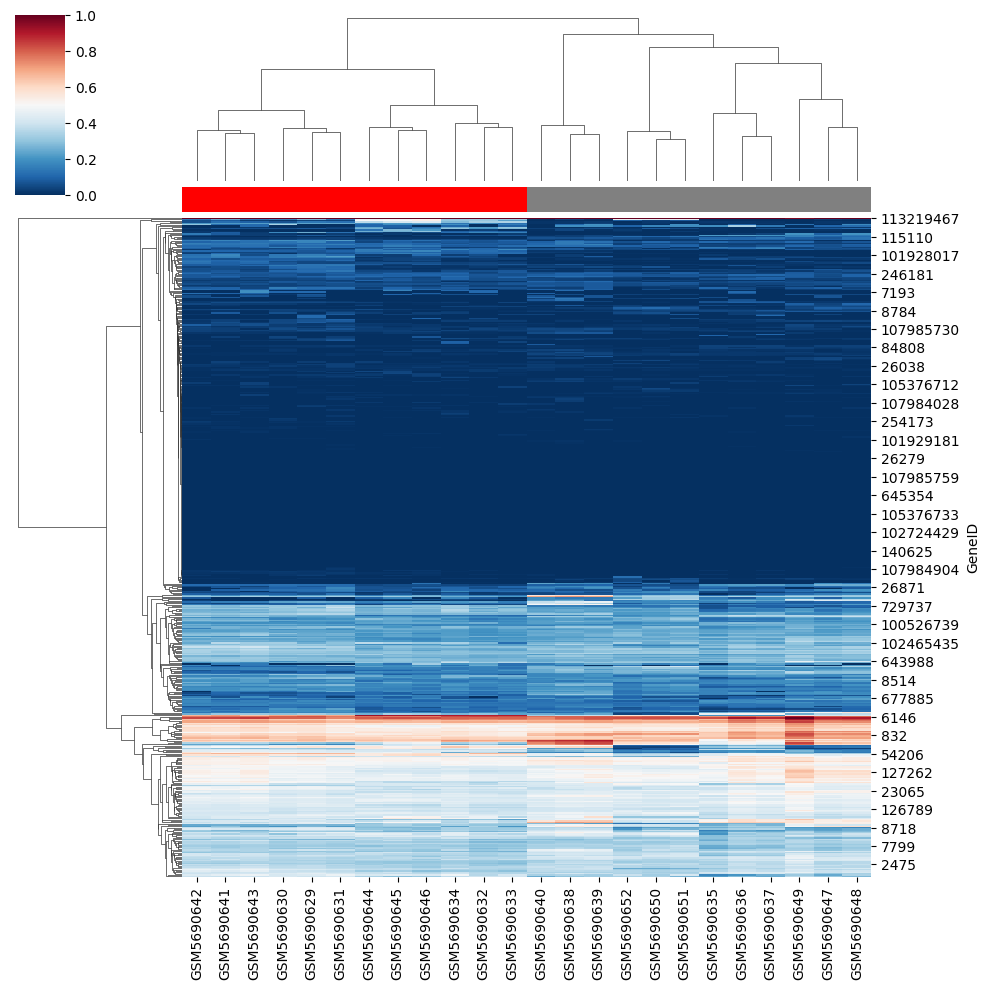

In [16]:
sns.clustermap(ldf.iloc[0:500,:], cmap=cmap, standard_scale=1, col_colors=[{'iMES':'red', '':'grey'}[ann] for ann in metadata.loc[:,'iMES']])

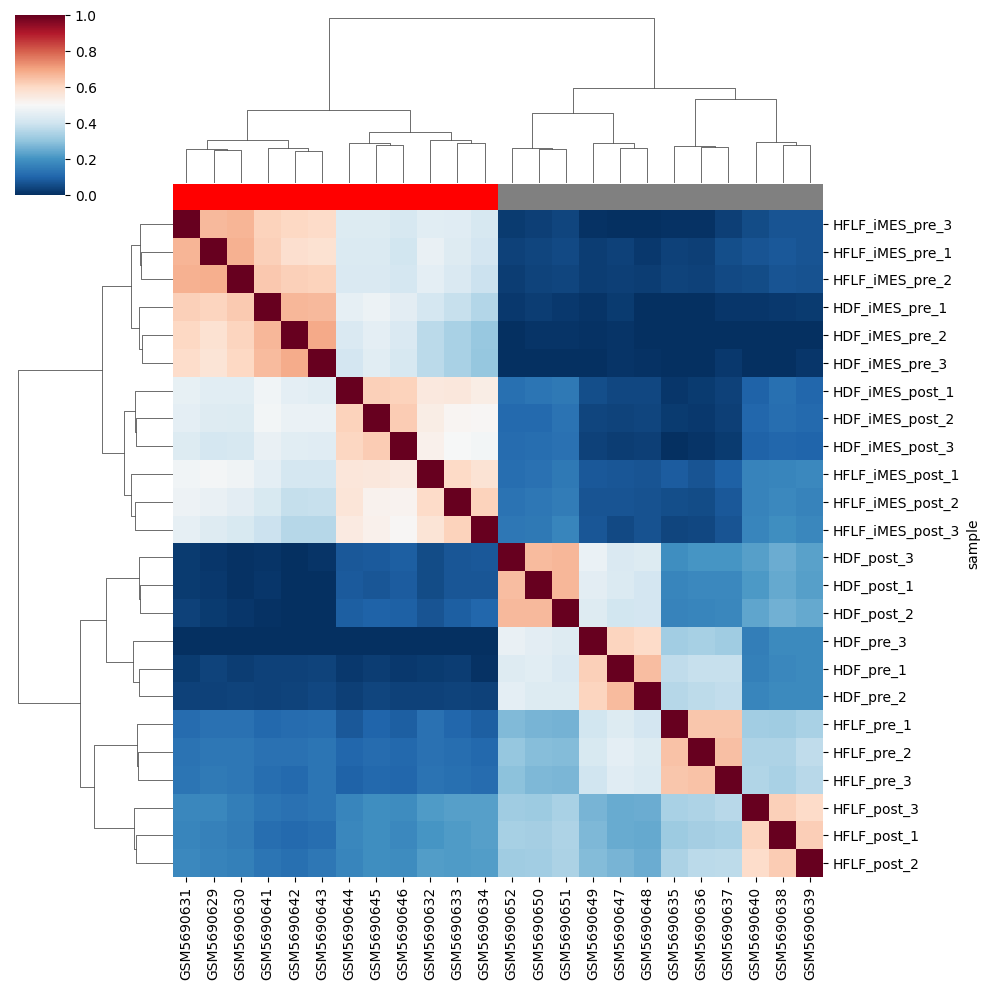

In [17]:
cor_mat = df.corr(method='spearman')
cor_mat.index = metadata.loc[:,'sample']
sns.clustermap(cor_mat, cmap=cmap, standard_scale=1, col_colors=[{'iMES':'red', '':'grey'}[ann] for ann in metadata.loc[:,'iMES']])

'test_iris.csv'